Importing of necessaray libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing of dataset

In [35]:
df = pd.read_csv("E:\\DEEPIKA\\Finlatics\\DsResearch\\DsResearch\\Banking\\banking_data.csv")

In [36]:
df

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,29,management,single,single,tertiary,no,765,no,no,cellular,16,nov,16-Nov,238,1,-1,0,unknown,yes
45212,68,retired,married,married,secondary,no,1146,no,no,cellular,16,nov,16-Nov,212,1,187,6,success,yes
45213,53,management,married,married,tertiary,no,583,no,no,cellular,17,nov,17-Nov,226,1,184,4,success,yes
45214,73,retired,married,married,secondary,no,2850,no,no,cellular,17,nov,17-Nov,300,1,40,8,failure,yes


In [37]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000
mean,40.938186,1362.277844,15.806507,258.166202,2.763668,40.202428,0.580657
std,10.621249,3044.609674,8.322022,257.515482,3.097896,100.128248,2.303778
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.500000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [38]:
df.dtypes

age                int64
job               object
marital           object
marital_status    object
education         object
default           object
balance            int64
housing           object
loan              object
contact           object
day                int64
month             object
day_month         object
duration           int64
campaign           int64
pdays              int64
previous           int64
poutcome          object
y                 object
dtype: object

In [39]:
print(df['marital'].isnull().value_counts())
print('\n')
print(df['marital_status'].isnull().value_counts())

marital
False    45213
True         3
Name: count, dtype: int64


marital_status
False    45213
True         3
Name: count, dtype: int64


To drop the 'marital' column since because 'marital' and 'marital status' are the same.

In [40]:
df.drop(columns=['marital'], inplace =True)
print(df)

       age           job marital_status  education default  balance housing  \
0       58    management        married   tertiary      no     2143     yes   
1       44    technician         single  secondary      no       29     yes   
2       33  entrepreneur        married  secondary      no        2     yes   
3       47   blue-collar        married    unknown      no     1506     yes   
4       33       unknown         single    unknown      no        1      no   
...    ...           ...            ...        ...     ...      ...     ...   
45211   29    management         single   tertiary      no      765      no   
45212   68       retired        married  secondary      no     1146      no   
45213   53    management        married   tertiary      no      583      no   
45214   73       retired        married  secondary      no     2850      no   
45215   71       retired       divorced    primary      no     1729      no   

      loan   contact  day month day_month  duration

To check if there is any null values

In [41]:
print(df.isnull().sum())

age               0
job               0
marital_status    3
education         3
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
day_month         0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64


Since there are only 3 missing values in both the 'marital status' column and the 'education' column, the 6 rows are thus dropped.

In [42]:
df.dropna(subset=['marital_status'], inplace =True)
df.dropna(subset=['education'], inplace =True)

In [43]:
print(df.isnull().sum())

age               0
job               0
marital_status    0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
day_month         0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64


Thus the data is now clean and ready to use for analysis

# ANALYSIS

1. What is the distribution of age among clients?


[]

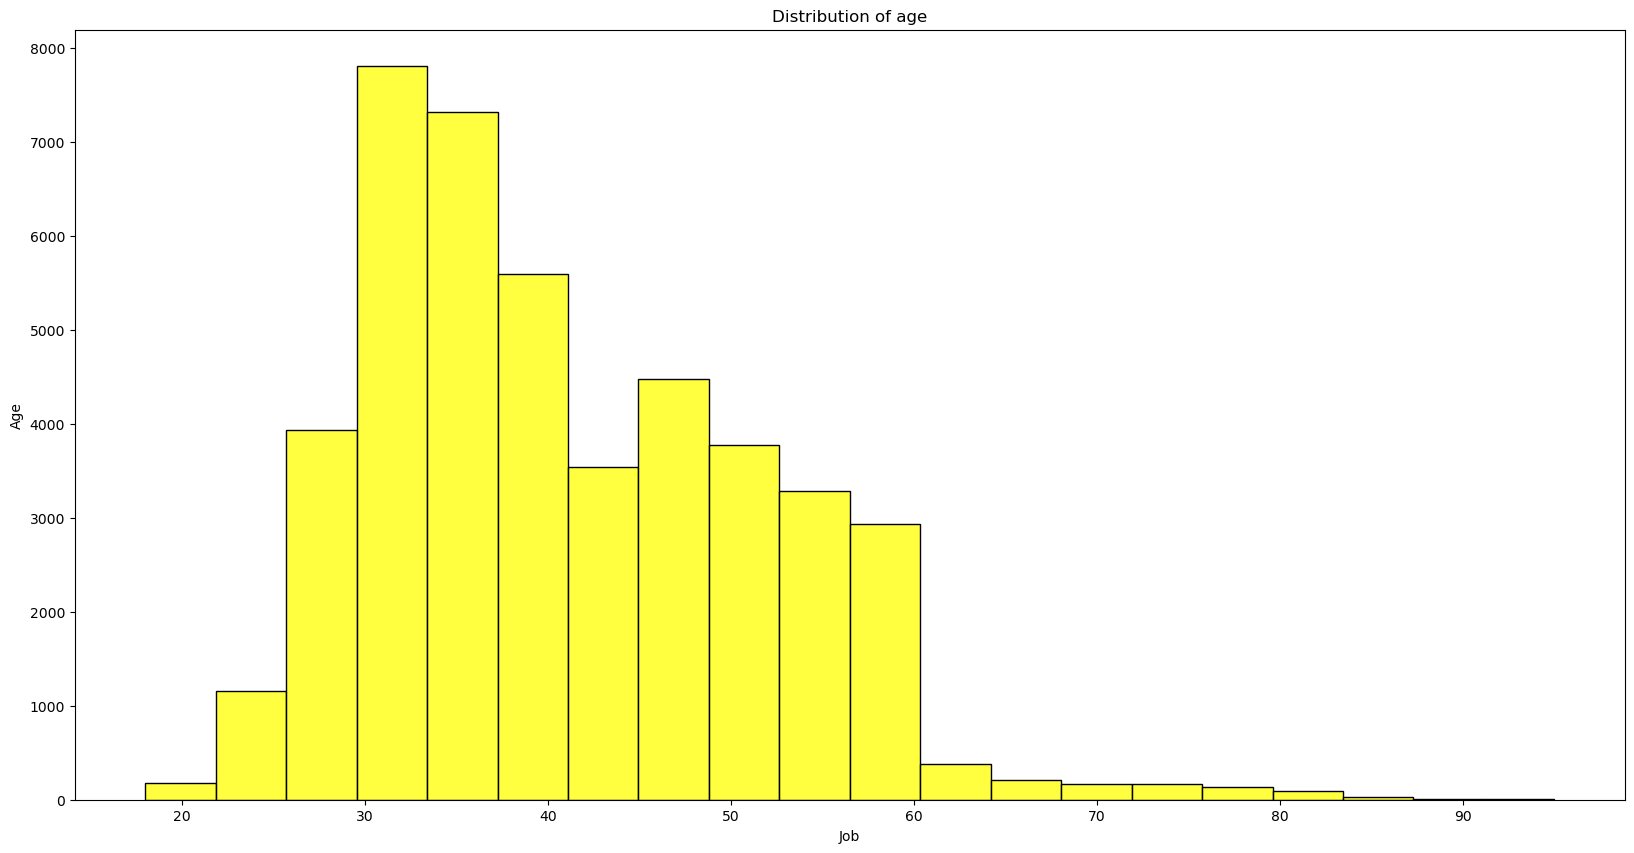

In [44]:
plt.figure(figsize=(20,10))
sns.histplot(x='age', bins=20,data=df, color='yellow')
plt.xlabel('Job')
plt.ylabel('Age')
plt.title('Distribution of age')
plt.plot()

INFERENCE : This bar plot shows the distribution of age among the clients. And we can infer that more clients are of the middle aged group between 30 and 40

[]

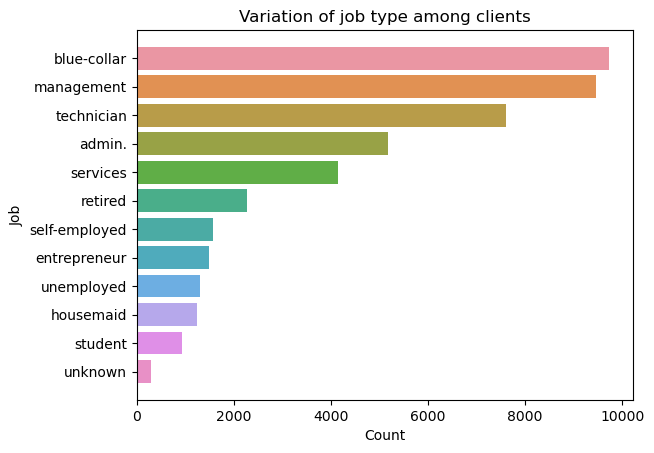

In [45]:
sns.countplot(y='job',order=df['job'].value_counts().index, data=df)
plt.xlabel('Count')
plt.ylabel('Job')
plt.title('Variation of job type among clients')
plt.plot()

INFERENCE : We can infer from the count plot that more people are in a blue-collar job followed by people in management sector.

[]

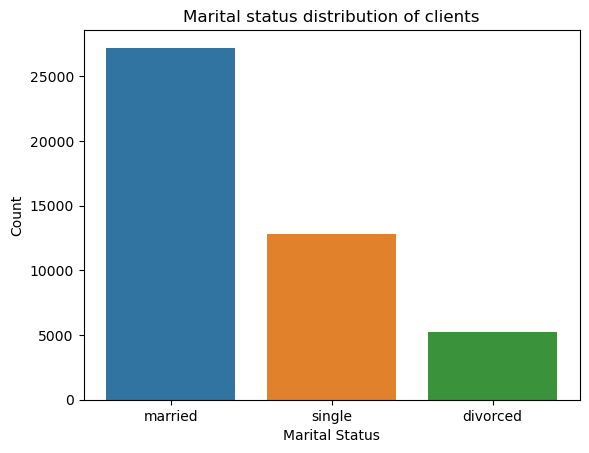

In [46]:
sns.countplot(x='marital_status', order=df['marital_status'].value_counts().index, data=df)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital status distribution of clients')
plt.plot()

INFERENCE : From the above count plot we can see that the count of married people are higher above 25000 and single are about 12000 followed by the divorced.

[]

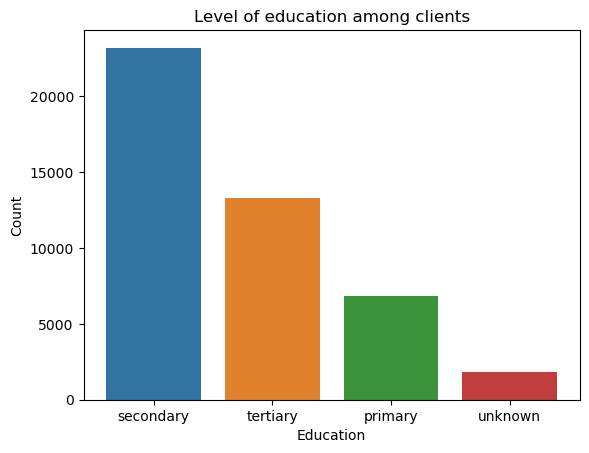

In [47]:
sns.countplot(x='education',order=df['education'].value_counts().index, data=df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Level of education among clients')
plt.plot()

[]

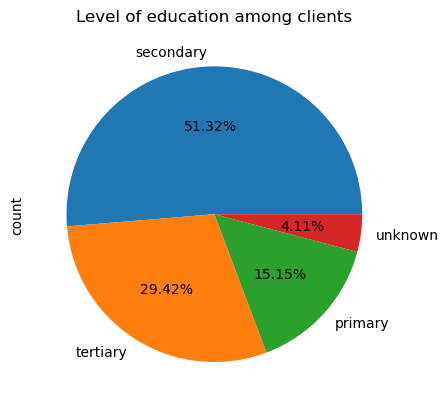

In [48]:
df['education'].value_counts().plot.pie(autopct="%.2f%%", )
plt.title('Level of education among clients')
plt.plot()

INFERENCE : We can see that a little more than half of the clients are having a secondary level of education followed by a significant count of clients with a tertiary level of education.

In [49]:
clients_with_credit_default = df['default'].value_counts().get('yes')
print(clients_with_credit_default)
proportion = clients_with_credit_default/df['default'].count()
print(f"Proportion of clients who have credit in default is {proportion}")


815
Proportion of clients who have credit in default is 0.018026985180269853


[]

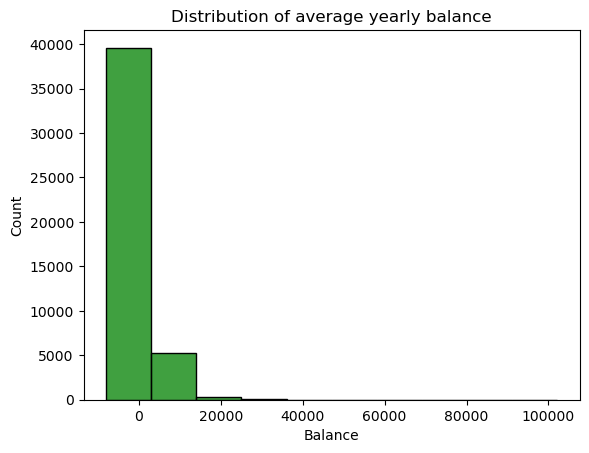

In [50]:
sns.histplot(x='balance',bins=10, data=df, color='green')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Distribution of average yearly balance')
plt.plot()

This gives the distribution of average yearly balance among the clients

25130 clients have housing loans


[]

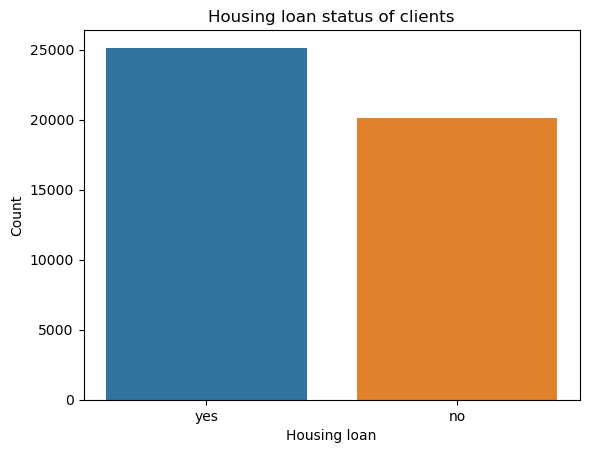

In [51]:
clients_with_housing_loans = df['housing'].value_counts().get('yes')
print(f"{clients_with_housing_loans} clients have housing loans")

sns.countplot(x='housing', order = df['housing'].value_counts().index, data=df)
plt.xlabel('Housing loan')
plt.ylabel('Count')
plt.title('Housing loan status of clients')
plt.plot()

INFERENCE : It gives the countplot of number of clients with and without housing loans.

7244 clients have housing loans


[]

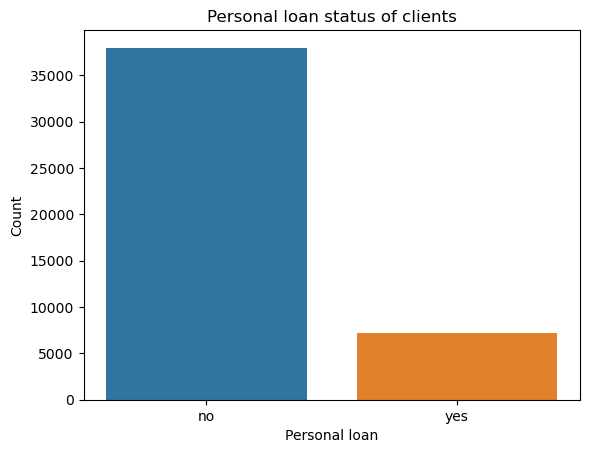

In [52]:
clients_with_personal_loans = df['loan'].value_counts().get('yes')
print(f"{clients_with_personal_loans} clients have housing loans")

sns.countplot(x='loan', order = df['loan'].value_counts().index, data=df)
plt.xlabel('Personal loan')
plt.ylabel('Count')
plt.title('Personal loan status of clients')
plt.plot()

INFERENCE : It gives the countplot of number of clients with and without personal loans.

The communication types used for contacting clients during the campaign are :

contact
cellular     29288
unknown      13020
telephone     2902
Name: count, dtype: int64


[]

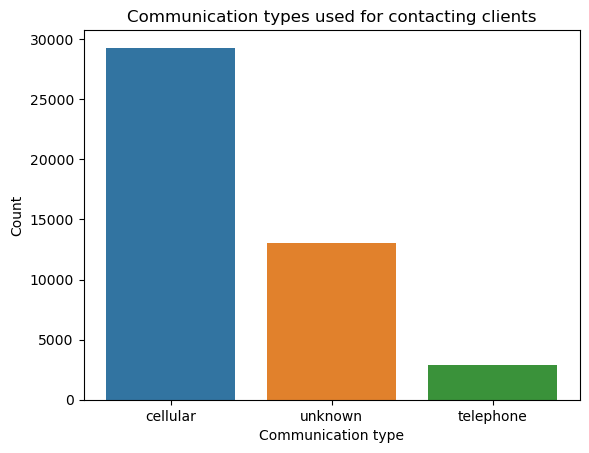

In [53]:
print(df['contact'].value_counts())
sns.countplot(x='contact', order = df['contact'].value_counts().index, data=df)
plt.xlabel('Communication type')
plt.ylabel('Count')
plt.title('Communication types used for contacting clients')
plt.plot()

In [54]:
day_df = df['day'].value_counts().sort_index().reset_index()
print(day_df)

    day  count
0     1    322
1     2   1293
2     3   1079
3     4   1445
4     5   1910
5     6   1932
6     7   1817
7     8   1840
8     9   1561
9    10    523
10   11   1479
11   12   1602
12   13   1585
13   14   1848
14   15   1703
15   16   1417
16   17   1941
17   18   2308
18   19   1757
19   20   2752
20   21   2025
21   22    905
22   23    939
23   24    447
24   25    840
25   26   1035
26   27   1121
27   28   1830
28   29   1745
29   30   1566
30   31    643


[]

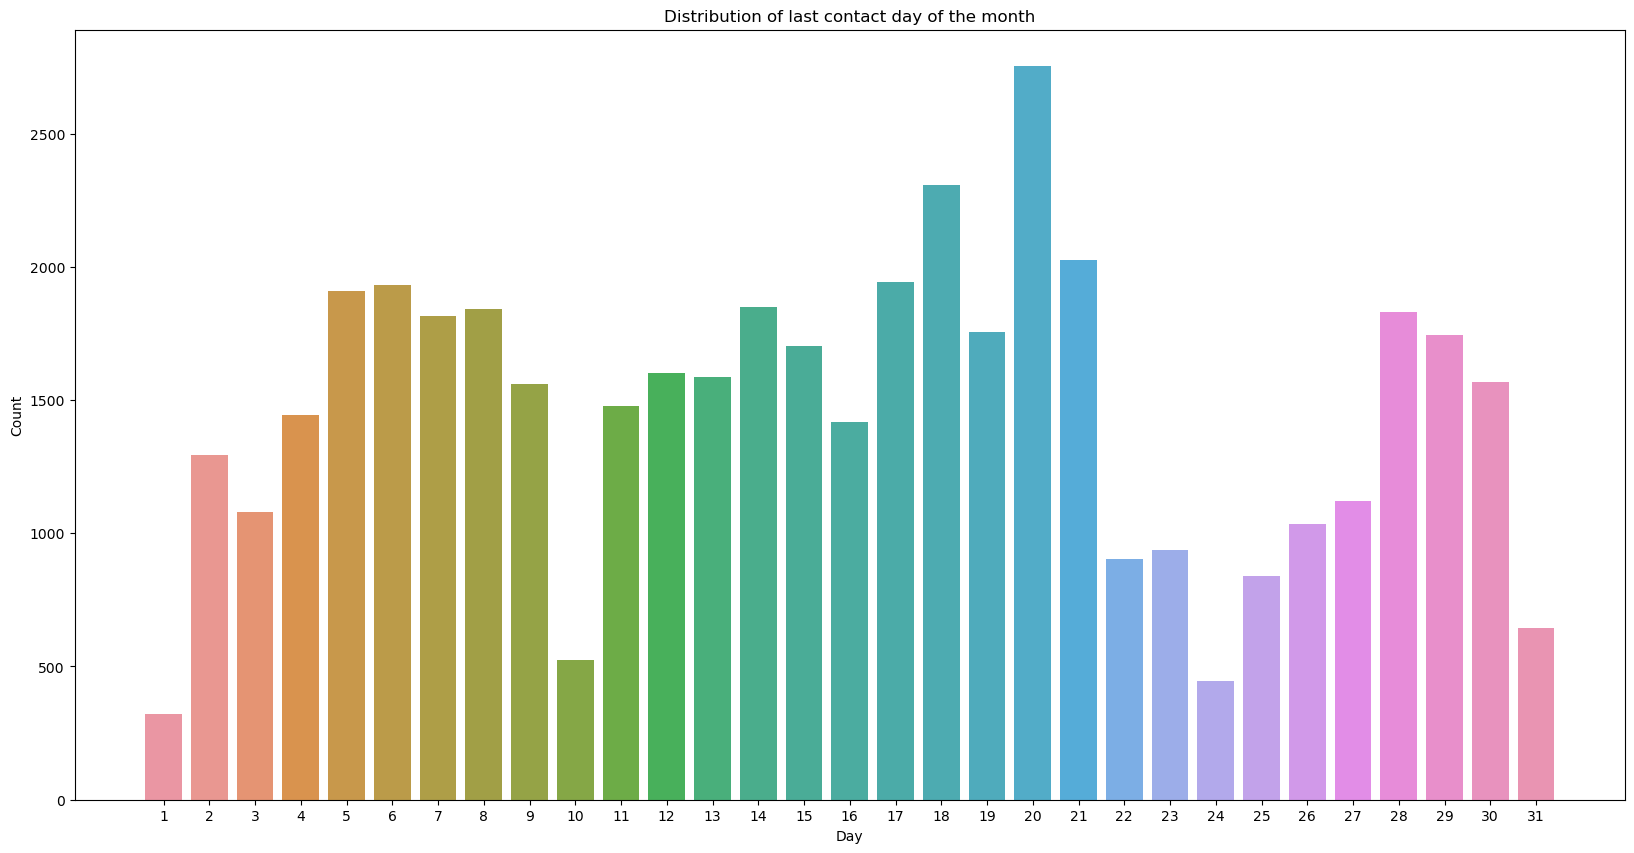

In [55]:
plt.figure(figsize=(20,10))
sns.barplot(x='day', y='count', data=day_df)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Distribution of last contact day of the month')
plt.plot()

INFERENCE : We can see that more people are contacted during the mid of the month.

In [56]:
month_df = df['month'].value_counts().sort_index().reset_index()
print(month_df)


   month  count
0    apr   2932
1    aug   6247
2    dec    214
3    feb   2649
4    jan   1403
5    jul   6895
6    jun   5341
7    mar    477
8    may  13766
9    nov   3972
10   oct    735
11   sep    579


[]

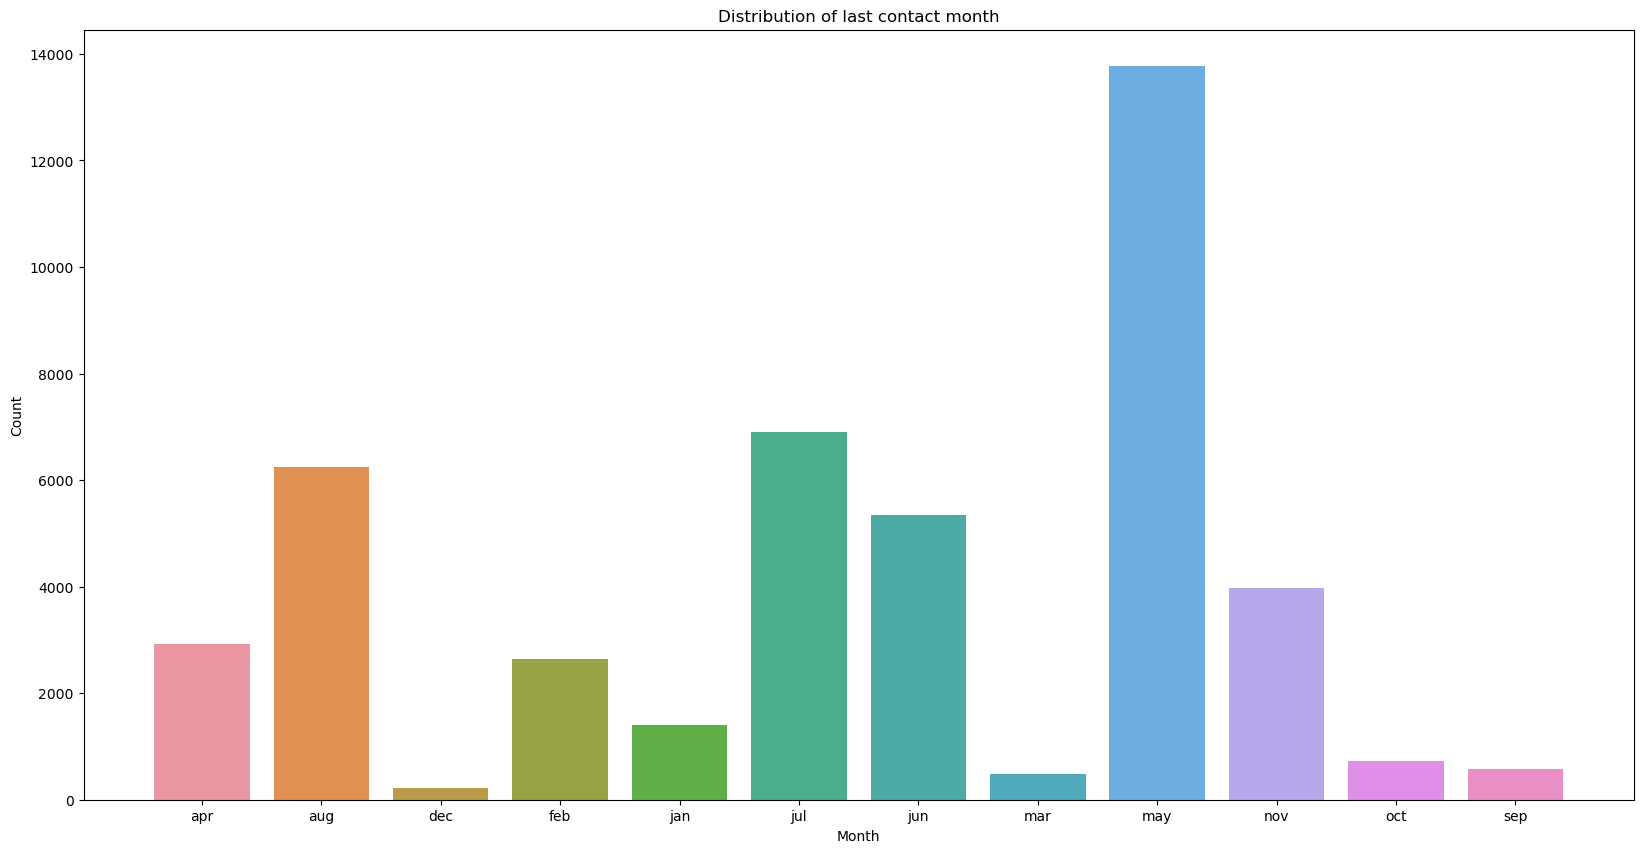

In [57]:
plt.figure(figsize=(20,10))

sns.barplot(x='month', y='count', data=month_df)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of last contact month')
plt.plot()

Distribution of the duration of the last contact?

[]

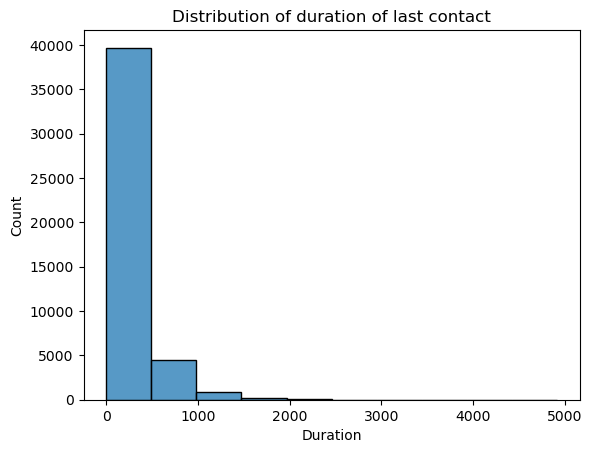

In [58]:
sns.histplot(x='duration',bins=10, data=df)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Distribution of duration of last contact')
plt.plot()

Number of contacts  performed during the campaign for each client

[]

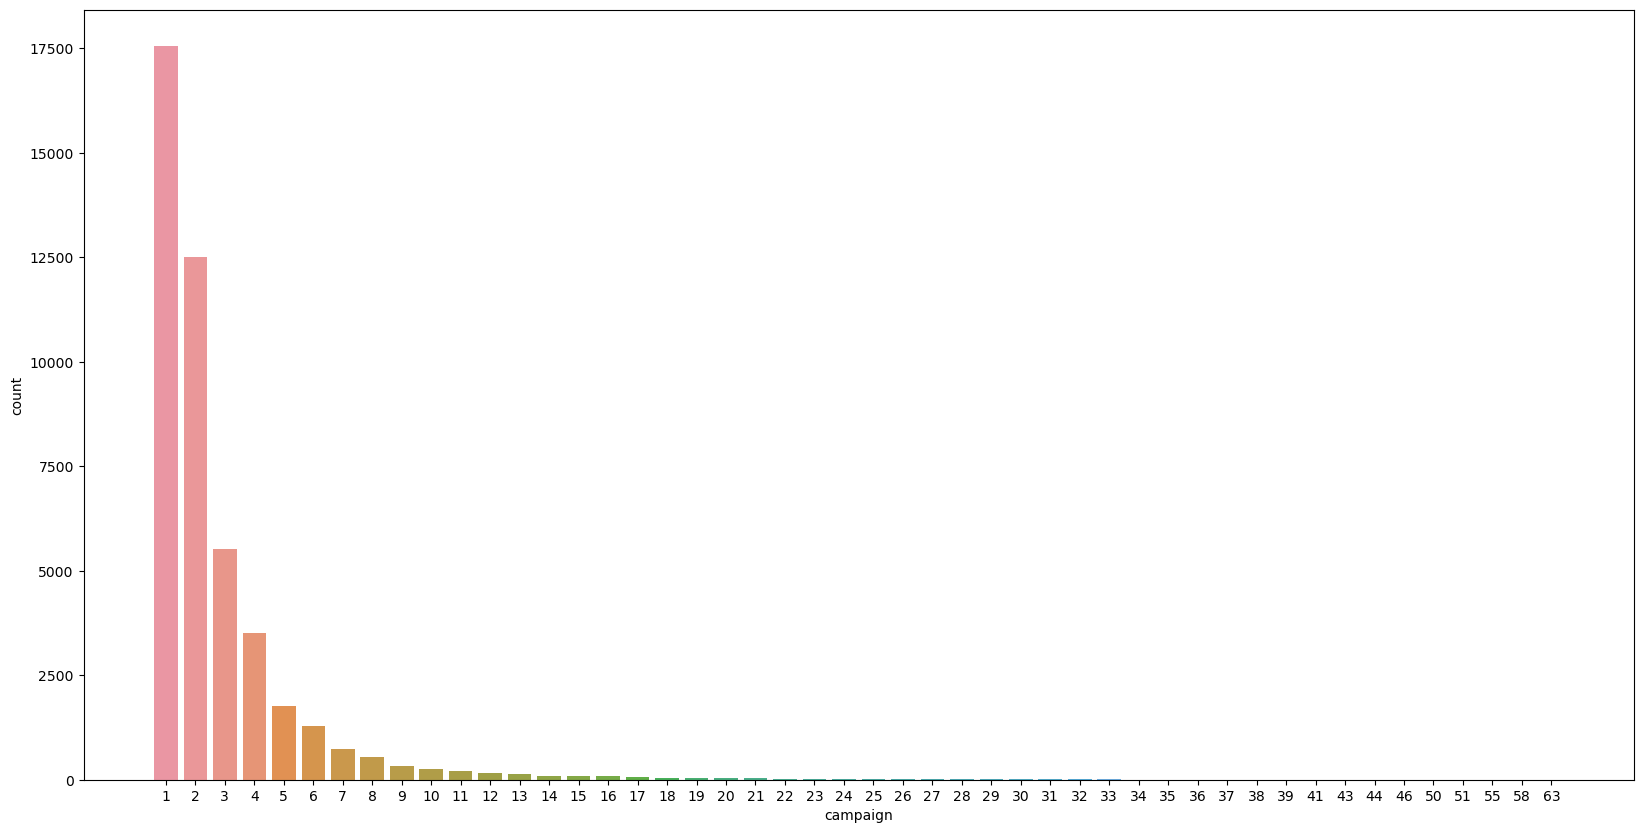

In [59]:
plt.figure(figsize=(20,10))
sns.countplot(x='campaign', order=sorted(df['campaign'].unique()), data=df)
plt.plot()

Distribution of the number of days passed since the client was last contacted from a previous campaign

[]

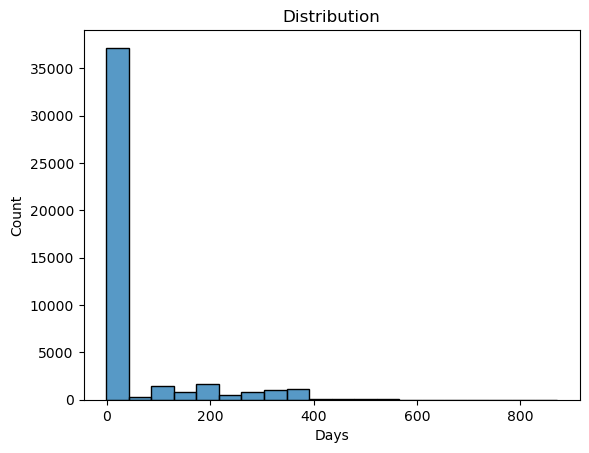

In [60]:
sns.histplot(x='pdays', bins=20, data=df)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Distribution')
plt.plot()

Outcomes of the previous marketing campaigns

[]

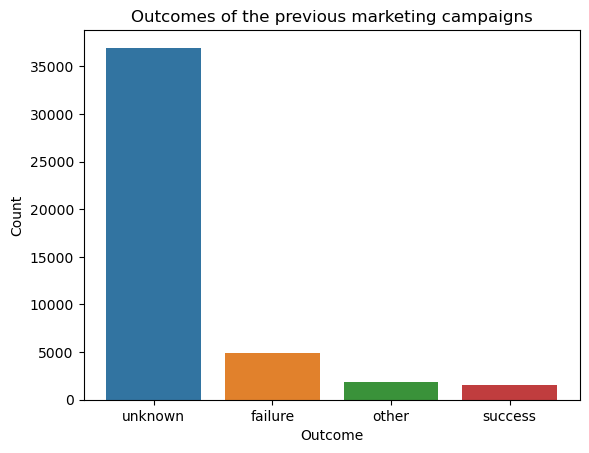

In [61]:
sns.countplot(x='poutcome', order=df['poutcome'].value_counts().index, data=df)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcomes of the previous marketing campaigns')
plt.plot()

Distribution of clients who subscribed to a term deposit vs. those who did not

[]

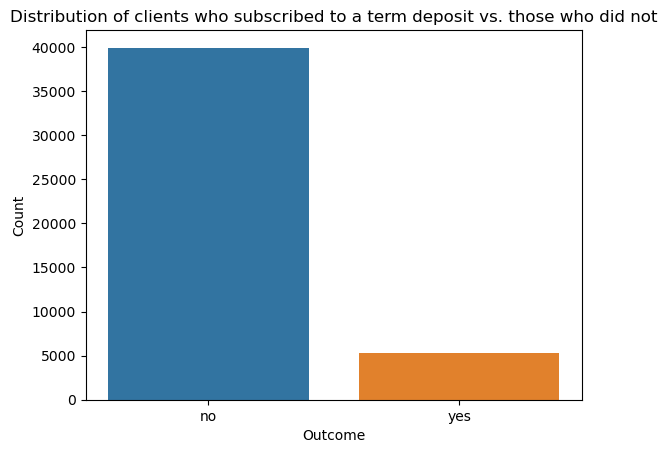

In [62]:
sns.countplot(x='y', order=df['y'].value_counts().index, data=df)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of clients who subscribed to a term deposit vs. those who did not')
plt.plot()